<a href="https://colab.research.google.com/github/KashishTiwari-17/OIBSIP_Data-science_task5/blob/main/task5%5Bsales_prediction%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.4 MB/s eta 0:00:00


   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

Missing Values:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Summary Statistics:
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000


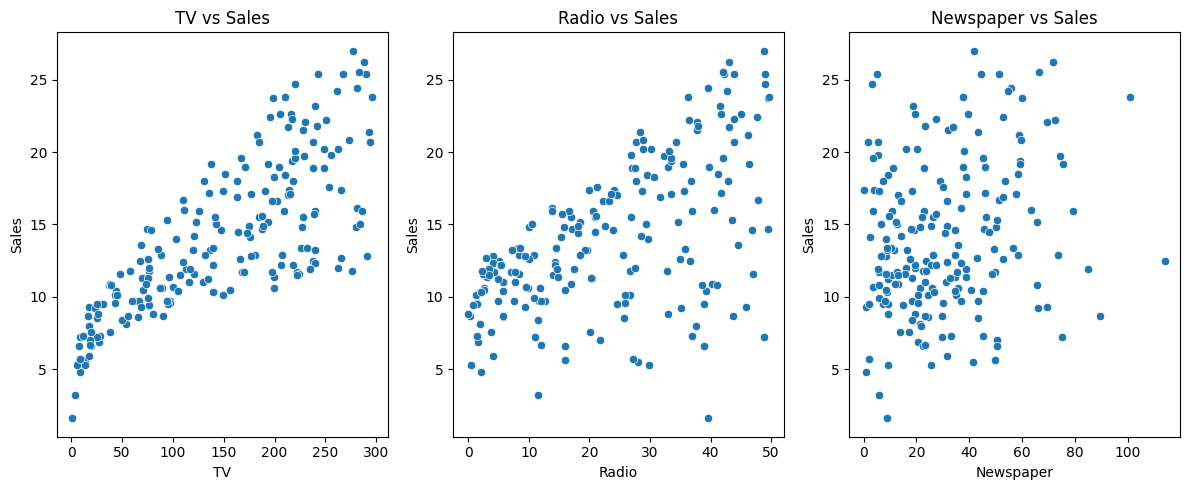

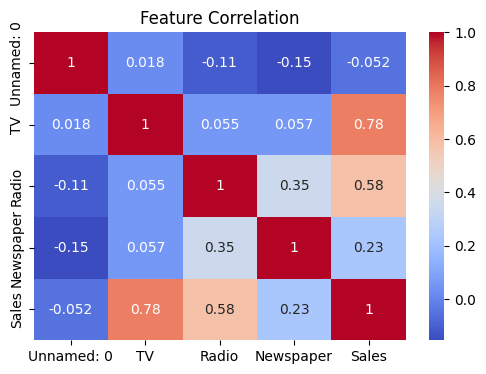


Model Evaluation:
  R² Score: 0.899438024100912
  RMSE: 1.78159966153345

Model saved as 'sales_prediction_model.pkl'

📊 === Predict Sales Based on Advertising Budget ===
Enter TV Advertising Budget (in $1000): 44
Enter Radio Advertising Budget (in $1000): 5
Enter Newspaper Advertising Budget (in $1000): 6

📈 Predicted Sales: 5.91 units

Would you like to predict again? (y/n): n
Thank you for using the Sales Predictor! 👋


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load Dataset
df = pd.read_csv('/content/Advertising.csv')
print(df.head())

# Step 3: Data Exploration
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe())

# Step 4: Data Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='TV', y='Sales')
plt.title('TV vs Sales')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Radio', y='Sales')
plt.title('Radio vs Sales')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Newspaper', y='Sales')
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

# Step 5: Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# Step 6: Prepare Data
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 9: Predict & Evaluate
y_pred = model.predict(X_test)

print("\nModel Evaluation:")
print("  R² Score:", r2_score(y_test, y_pred))
print("  RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Step 10: Save Model
joblib.dump(model, 'sales_prediction_model.pkl')
print("\nModel saved as 'sales_prediction_model.pkl'")

def predict_sales():
    print("\n📊 === Predict Sales Based on Advertising Budget ===")

    try:
        tv = float(input("Enter TV Advertising Budget (in $1000): "))
        radio = float(input("Enter Radio Advertising Budget (in $1000): "))
        newspaper = float(input("Enter Newspaper Advertising Budget (in $1000): "))
    except ValueError:
        print("❌ Invalid input! Please enter numeric values.")
        return

    input_data = np.array([[tv, radio, newspaper]])
    prediction = model.predict(input_data)[0]
    print(f"\n📈 Predicted Sales: {prediction:.2f} units")

# === Step 8: Run the Predictor ===
if __name__ == "__main__":
    while True:
        predict_sales()
        again = input("\nWould you like to predict again? (y/n): ").lower()
        if again != 'y':
            print("Thank you for using the Sales Predictor! 👋")
            break
